In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = [[2008, 1, 20], [2008, 2, 30], [2008, 3, 39], [2008, 4, 60],
        [2009, 1, 40], [2009, 2, 51], [2009, 3, 62], [2009, 4, 81],
        [2010, 1, 50], [2010, 2, 64], [2010, 3, 74], [2010, 4, 95]]

df = pd.DataFrame(data, columns = ['year', 'quarter', 'y'])
df

,year,quarter,y
0,2008,1,20
1,2008,2,30
2,2008,3,39
3,2008,4,60
4,2009,1,40
5,2009,2,51
6,2009,3,62
7,2009,4,81
8,2010,1,50
9,2010,2,64


In [18]:
x = np.arange(1, len(df)+1)
#x

In [19]:
df = pd.concat([df, pd.DataFrame(x, columns=['x'])], axis=1)
df = df[['year', 'quarter', 'x', 'y']]
#df

In [20]:
#df.describe()

In [21]:
df['ma']=df['y'].rolling(window=4,center=False).mean()
df

,year,quarter,x,y,ma
0,2008,1,1,20,NaN
1,2008,2,2,30,NaN
2,2008,3,3,39,NaN
3,2008,4,4,60,37.25
4,2009,1,5,40,42.25
5,2009,2,6,51,47.50
6,2009,3,7,62,53.25
7,2009,4,8,81,58.50
8,2010,1,9,50,61.00
9,2010,2,10,64,64.25


In [22]:
c = lambda i, j: (df.iloc[i,j] + df.iloc[i+1,j])/2
for k in range(3,11):
    df.at[k-1,'ca'] = c(k, 4)
df

,year,quarter,x,y,ma,ca
0,2008,1,1,20,NaN,NaN
1,2008,2,2,30,NaN,NaN
2,2008,3,3,39,NaN,39.750
3,2008,4,4,60,37.25,44.875
4,2009,1,5,40,42.25,50.375
5,2009,2,6,51,47.50,55.875
6,2009,3,7,62,53.25,59.750
7,2009,4,8,81,58.50,62.625
8,2010,1,9,50,61.00,65.750
9,2010,2,10,64,64.25,69.000


In [23]:
df['avg'] = df.apply(lambda row: row.y/row.ca, axis=1)
df

,year,quarter,x,y,ma,ca,avg
0,2008,1,1,20,NaN,NaN,NaN
1,2008,2,2,30,NaN,NaN,NaN
2,2008,3,3,39,NaN,39.750,0.981132
3,2008,4,4,60,37.25,44.875,1.337047
4,2009,1,5,40,42.25,50.375,0.794045
5,2009,2,6,51,47.50,55.875,0.912752
6,2009,3,7,62,53.25,59.750,1.037657
7,2009,4,8,81,58.50,62.625,1.293413
8,2010,1,9,50,61.00,65.750,0.760456
9,2010,2,10,64,64.25,69.000,0.927536


In [24]:
t = df.groupby(['quarter'], as_index=False)[['avg']].mean()
t

,quarter,avg
0,1,0.777250
1,2,0.920144
2,3,1.009394
3,4,1.315230


In [25]:
t.rename(index=str, columns={'avg': 'q_mean'}, inplace=True)
t

,quarter,q_mean
0,1,0.777250
1,2,0.920144
2,3,1.009394
3,4,1.315230


In [27]:
sum(t['q_mean'])

4.0220191775818

In [28]:
adj_factor = 4/sum(t['q_mean'])
adj_factor

0.9945253424686455

In [29]:
t['s_index'] = t.apply(lambda row: row.q_mean*adj_factor, axis = 1)
t

,quarter,q_mean,s_index
0,1,0.777250,0.772995
1,2,0.920144,0.915106
2,3,1.009394,1.003868
3,4,1.315230,1.308030


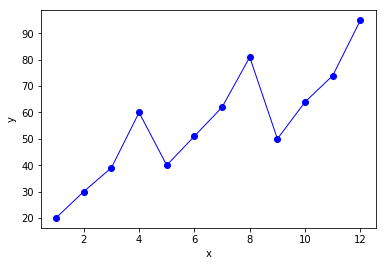

In [31]:
from sklearn.linear_model import LinearRegression

plt.plot(df['x'], df['y'], 'bo-', linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [32]:
reg = LinearRegression().fit(df[['x']], df[['y']])
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
b1 = reg.coef_[0][0]
b0 = reg.intercept_[0]
df1 = pd.DataFrame(columns = ['year', 'quarter', 'x'])
df1

,year,quarter,x


In [34]:
i = df['x'].max()
for yr in range(2011, 2014):
    for qrt in range(1,5):
        i += 1
        df1 = df1.append({'year':yr, 'quarter': qrt, 'x':i}, ignore_index=True)
df1

,year,quarter,x
0,2011,1,13
1,2011,2,14
2,2011,3,15
3,2011,4,16
4,2012,1,17
5,2012,2,18
6,2012,3,19
7,2012,4,20
8,2013,1,21
9,2013,2,22


In [35]:
df1['y'] = df1.apply(lambda row: row.x*b1+b0, axis = 1)
df1

,year,quarter,x,y
0,2011,1,13,89.136364
1,2011,2,14,94.311189
2,2011,3,15,99.486014
3,2011,4,16,104.660839
4,2012,1,17,109.835664
5,2012,2,18,115.010490
6,2012,3,19,120.185315
7,2012,4,20,125.360140
8,2013,1,21,130.534965
9,2013,2,22,135.709790


In [36]:
t['s_index']

0    0.772995
1    0.915106
2    1.003868
3    1.308030
Name: s_index, dtype: float64

In [37]:
def seasonal_index(q):
    s_idx = t['s_index'].where(t['quarter'] == q).sum()
    return(s_idx)

In [38]:
df1['y_adj'] = df1.apply(lambda row: row.y*seasonal_index(row.quarter), axis=1)
df1

,year,quarter,x,y,y_adj
0,2011,1,13,89.136364,68.901989
1,2011,2,14,94.311189,86.304780
2,2011,3,15,99.486014,99.870866
3,2011,4,16,104.660839,136.899499
4,2012,1,17,109.835664,84.902451
5,2012,2,18,115.010490,105.246844
6,2012,3,19,120.185315,120.650240
7,2012,4,20,125.360140,163.974802
8,2013,1,21,130.534965,100.902913
9,2013,2,22,135.709790,124.188909


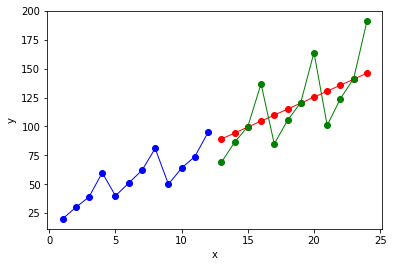

In [39]:
plt.plot(df['x'], df['y'], 'bo-', linewidth=1)
plt.plot(df1['x'], df1['y'], 'ro-', linewidth=1)
plt.plot(df1['x'], df1['y_adj'], 'go-', linewidth=1)

plt.xlabel('x')
plt.ylabel('y')
plt.show()